Logical fail rate: 0.0


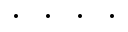

In [4]:
import stim, pymatching as pm, numpy as np
from IPython.display import SVG

# d=3 rotated surface code, one round, circuit noise-free

c = stim.Circuit()
# data qubits 0..8
# ancillas 9..12
# measure 4 plaquettes
c.append("M", [9,10,11,12])
for i in range(4):
    c.append("DETECTOR", [stim.target_rec(-1-i)])

c.append("OBSERVABLE_INCLUDE", [stim.target_rec(-1)], 0)

dem = c.detector_error_model()
m = pm.Matching.from_detector_error_model(dem)

sampler = c.compile_detector_sampler()
dets, obs = sampler.sample(shots=1000, separate_observables=True)

pred = m.decode_batch(dets)
print("Logical fail rate:", np.mean(pred != obs))
SVG(str(c.diagram("detslice-svg")))


In [5]:
import pymatching as pm
dem = c.detector_error_model(decompose_errors=True)
m = pm.Matching.from_detector_error_model(dem)
pred = m.decode_batch(dets)         # compare vs obs to get p_L
pL = np.mean(pred != obs, axis=0)


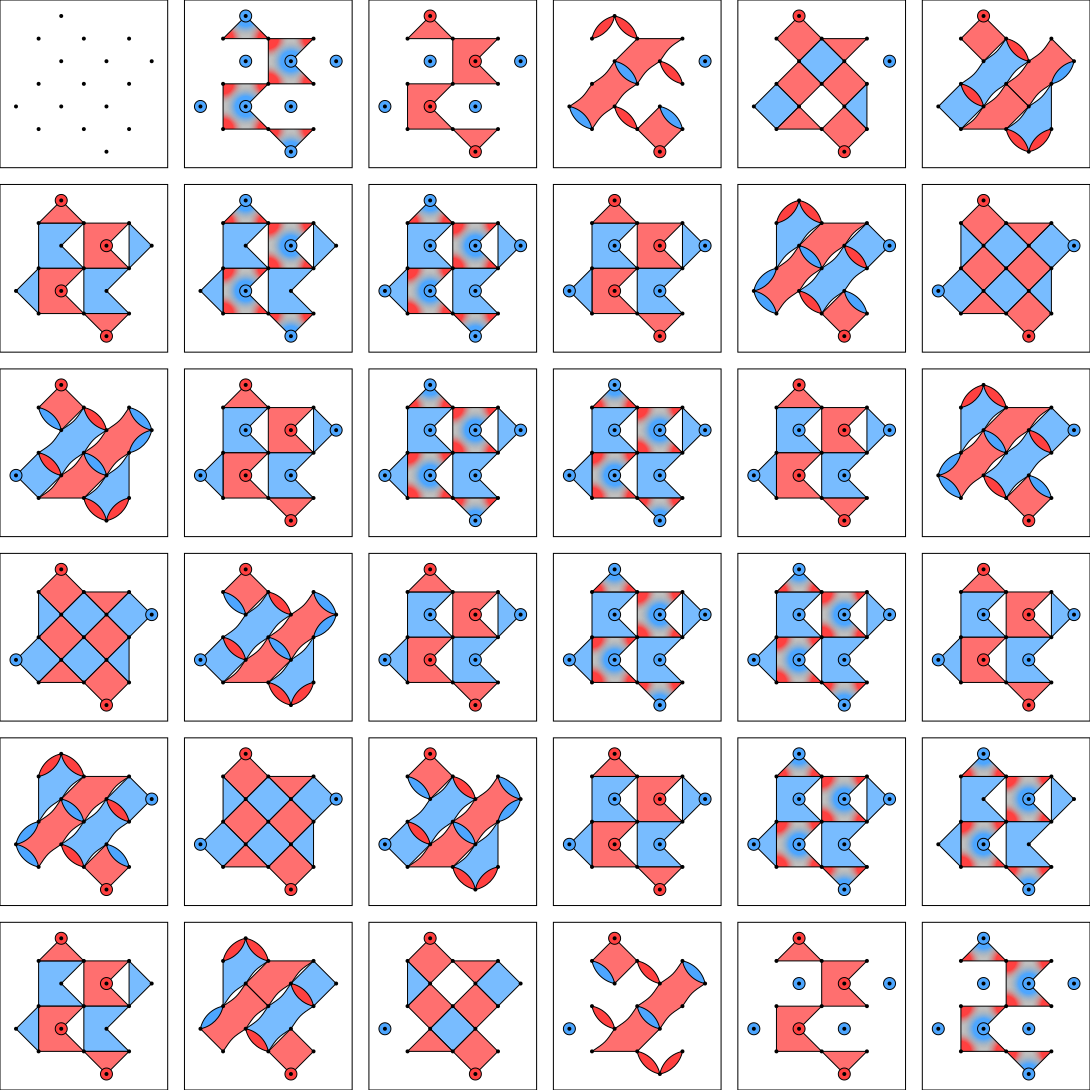

In [11]:
import stim
c = stim.Circuit.generated(
    "surface_code:rotated_memory_x",
    distance=3,
    rounds=5,
    after_clifford_depolarization=0.005
)
c[1]
SVG(str(c.diagram("detslice-svg")))